<font face="B Mitra" size=4>
<div dir=rtl align=center>

<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">

<br>
<font size=2>
<b>دانشگاه صنعتی امیرکبیر - دانشکده ریاضی و علوم کامپیوتر</b>
</font>

<br>
<font size=6>
<b>گرافیک کامپیوتری</b>
</font>

<br>
<hr/>
<font size=6>
<b>تمرین ششم</b>
</font>

<br>
استاد: دکتر مصطفی شمسی

<br>
طراحان:‌ شیوا صالح، هلیا صاحب‌قدم، حسین قرمزچشمه و سینا مرادی

<hr>
</div>
</font>


<font face="B Mitra" size=5>
<div dir=rtl>

<p>
<font size=4>
لطفا فایل نوت بوک نهایی را با الگوی زیر در سامانه کورسز آپلود کنید.
</font>
</p>

<div dir=ltr>
<font face="Times New Roman" size=4 dir=ltr>
شماره دانشجویی_CG_HW6.ipynb
</font>
</div>

</div>

<div dir=rtl>

<p align="justify">
<font size=4 color="lightblue">
در صورتی که فایل را به صورت لوکال باز‌ می‌کنید، از دستورات مناسب که در فایل تمرین سری اول وجود داشت جهت نمایش تصاویر استفاده کنید.
</font>
</div>
</font>

<font face="B Mitra" size=4>

<hr>
<div dir="rtl">
    <h3>کتابخانه‌های مورد نیاز</h3>
    <p>صرفا سلول زیر را اجرا کنید</p>
</div>
</font>

In [1]:
import cv2
import requests
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def read_image_from_url(url, flags=cv2.IMREAD_COLOR):
    response = requests.get(url)
    response.raise_for_status()
    img_array = np.array(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, flags)
    return img


<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>سوال 1: پیاده‌سازی و بررسی فیلتر‌های میانه</h3>
        <p>
            الف) تابع اعمال فیلتر median را با توجه به جزوه پیاده‌سازی کنید.
            سپس عکسی که لینک آن برای شما قرار داده شده را به این تابع بدهید و خروجی را نمایش دهید.
            (دقت کنید که مجاز به استفاده از تابع آماده در کتابخانه CV2 نیستید.)
        </p>
    </div>
</font>


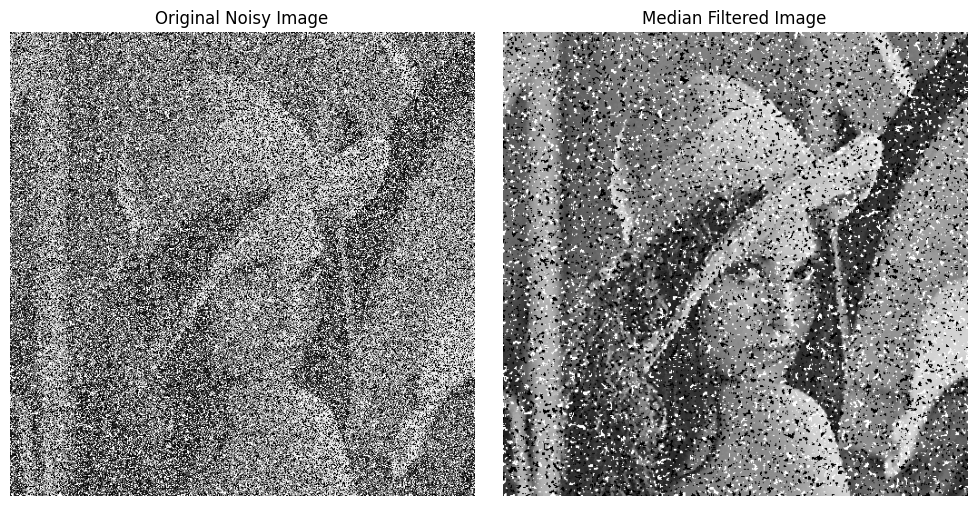

In [8]:
image = read_image_from_url("https://i.ibb.co/WpGmvkW/noisy-image-median.png", cv2.IMREAD_GRAYSCALE) # it's a noisy image

def median_filter(image, window_size):
  # TODO: ...
  final_image = np.zeros_like(image)

  pad_size = window_size // 2
  padded_image = np.pad(image, pad_size, mode='reflect')

  for i in range(pad_size, padded_image.shape[0] - pad_size):
    for j in range(pad_size, padded_image.shape[1] - pad_size):
      window = padded_image[i-pad_size : i+pad_size+1, j-pad_size : j+pad_size+1]
      final_image[i-pad_size, j-pad_size] = np.median(window)

  return final_image

median_filtered_image = median_filter(image, window_size=3)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Noisy Image')
axs[0].axis('off')

axs[1].imshow(median_filtered_image, cmap='gray')
axs[1].set_title('Median Filtered Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
            ب) با توجه به مراحلی که در ادامه آماده است، تابع Decision-based median filter را پیاده‌سازی کنید.
            سپس خروجی آن را بر روی تصویر نویزی قبلی نمایش دهید.
        </p>
        <h4>مراحل پیاده‌سازی Decision-based median filter</h4>
        <ol>
            <li>
                <b>شناسایی نویز:</b>
                <p>
                    بررسی می‌شود که آیا شدت روشنایی (intensity) پیکسل برابر با مقادیر ۰ یا ۲۵۵ است (مقادیر مربوط به نویز).
                    اگر مقدار شدت روشنایی بین ۰ و ۲۵۵ باشد، پیکسل به عنوان "پیکسل سالم" شناخته شده و تغییری نمی‌کند.
                </p>
            </li>
            <li>
                <b>یافتن همسایه‌ها:</b>
                <p>
                    همسایه‌های پیکسل مورد نظر در یک پنجره
                    ۳×۳
                    استخراج می‌شوند و به دو دسته تقسیم می‌گردند:
                </p>
                <ul>
                    <li><b>همسایه‌های سالم:</b> شدت روشنایی آنها بین ۰ و ۲۵۵ است.</li>
                    <li><b>همسایه‌های نویزی:</b> شدت روشنایی آنها برابر با ۰ یا ۲۵۵ است.</li>
                </ul>
            </li>
            <li>
                <b>جایگزینی مقدار شدت روشنایی:</b>
                <ul>
                    <li>اگر پیکسل دارای همسایه‌های سالم باشد، مقدار شدت روشنایی آن با میانه همسایه‌های سالم جایگزین می‌شود.</li>
                    <li>اگر پیکسل هیچ همسایه سالمی نداشته باشد، پنجره افزایش می‌یابد.</li>
                </ul>
            </li>
            <li>
                <b>افزایش اندازه پنجره:</b>
                <p>
                    اگر در پنجره
                    ۳×۳
                    همسایه سالمی یافت نشود، اندازه پنجره به
                    ۵×۵
                    افزایش یافته و مجدداً بررسی انجام می‌شود.
                </p>
            </li>
            <li>
                <b>عدم وجود همسایه سالم:</b>
                <p>
                    اگر حتی در پنجره
                    ۵×۵
                    نیز همسایه سالمی وجود نداشته باشد، مقدار شدت روشنایی پیکسل با مقدار شدت روشنایی پیکسل قبلی جایگزین می‌شود.
                </p>
            </li>
        </ol>
    </div>
</font>


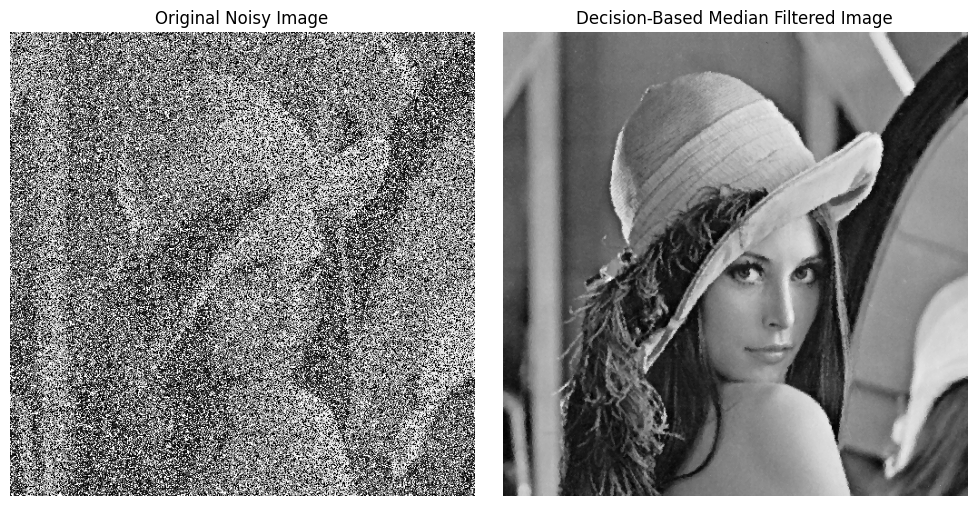

In [ ]:
def decision_based_median(image):
    # TODO: ...
    final_image = np.copy(image)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            current_pixel = image[i, j]
            if current_pixel == 0 or current_pixel == 255:
                neighbors = image[max(0, i-1) : min(height, i+2), max(0, j-1) : min(width, j+2)]
                valid_neighbors = neighbors[(neighbors > 0) & (neighbors < 255)]

                if len(valid_neighbors) > 0:
                    final_image[i, j] = np.median(valid_neighbors)

                else:
                    neighbors = image[max(0, i-2) : min(height, i+3), max(0, j-2) : min(width, j+3)]
                    valid_neighbors = neighbors[(neighbors > 0) & (neighbors < 255)]

                    if len(valid_neighbors) > 0:
                        final_image[i, j] = np.median(valid_neighbors)

                    else:
                        if j > 0:
                            final_image[i, j] = final_image[i, j - 1]
                        elif i > 0:
                            final_image[i, j] = final_image[i - 1, j]
                        else:
                            final_image[i, j] = current_pixel

    return final_image

decision_based_filtered_image = decision_based_median(image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Noisy Image')
axs[0].axis('off')

axs[1].imshow(decision_based_filtered_image, cmap='gray')
axs[1].set_title('Decision-Based Median Filtered Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
          Decision-based median filter را با فیلتر میانه عادی با توجه به نتایج مقایسه کنید.
        </p>
    </div>
</font>


<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
از آنجا که تصویر اولیه دارای نویز بسیار شدید و متراکمی است، به گونه‌ای که جزئیات تصویر به سختی قابل تشخیص می‌باشد، فیلتر میانه عادی با آنکه نویزها را تا حدی کاهش داده است که ما نسبتا متوجه جزئیات تصویر می‌شویم، اما همچنان تصویر به حد مطلوبی رفع نویز نشده است. این می‌تواند به خاطر ضعف فیلتر میانه عادی در نویزهای شدید باشد که مثلا همسایه‌های یک پیکسل به گونه‌ای هستند که میانه‌شان نیز باز یک نویز است. در مقابل، فیلتر Decision-Based Median خروجی بسیار بهتر و باکیفیت‌تری به ما داده است؛ لبه‌ها و جزئیات تصویر تا حد خوبی حفظ شده‌اند و واضح‌تر به نظر می‌رسند و تغییرات نرم بسیار بیشتری نسبت به فیلتر میانه عادی مشاهده می‌شود. این به خاطر آن است که در این روش ابتدا پیکسل‌های نویزدار را پیدا، و سپس میانه همسایه‌های سالم این پیکسل‌ها را به عنوان مقدار جایگزین آن‌ها انتخاب می‌کنیم.
</p>
</font>
</div>
<hr>

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
          حال Decision-based median filter را بر روی تصویر زیر اعمال کنید.
        </p>
    </div>
</font>


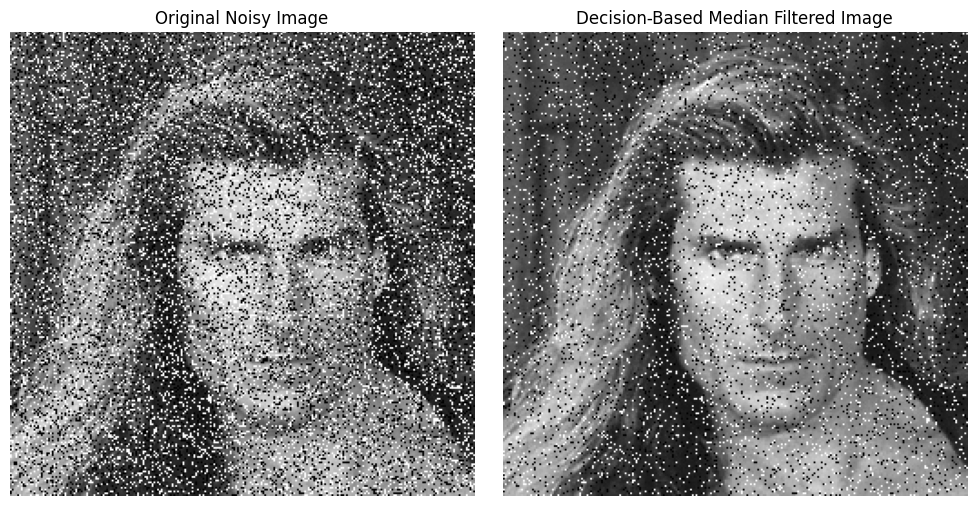

In [ ]:
image = read_image_from_url("https://i.ibb.co/JHfR6qr/heavy.jpg", cv2.IMREAD_GRAYSCALE) # it's a noisy image

# TODO
decision_based_filtered_image = decision_based_median(image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Noisy Image')
axs[0].axis('off')

axs[1].imshow(decision_based_filtered_image, cmap='gray')
axs[1].set_title('Decision-Based Median Filtered Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

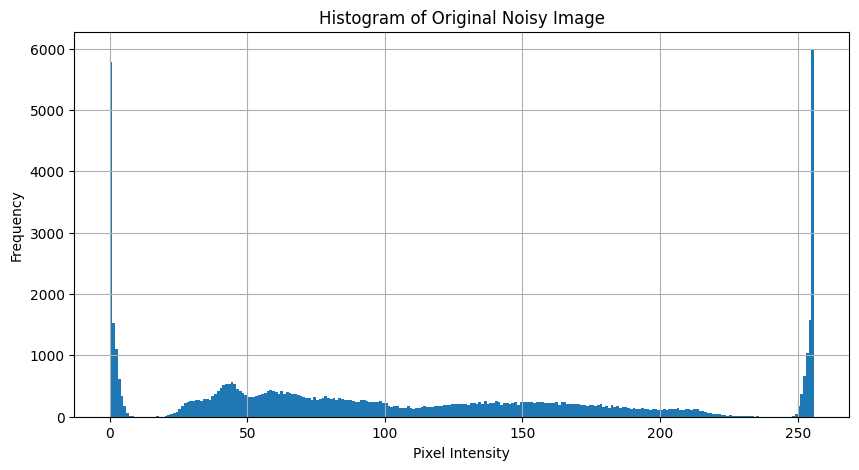

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(image.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Original Noisy Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
            ج)
            چرا فیلتر گفته شده بر روی این تصویر نتیجه مناسبی نداشت؟
            <br>
            <b>راهنمایی:</b> برای تحلیل کردن میتوانید از هیستوگرام تصویر نویزی استفاده کنید.
        </p>
    </div>
</font>


<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
با توجه به هیستوگرام تصویر نویزی، می‌توان متوجه شد که علاوه بر تعداد بسیار زیاد پیسکل‌هایی با شدت 0 و 255، تعداد پیکسل‌ها با شدت نزدیک به 0 و 255 نیز زیاد هستند، پس احتمالا این پیکسل‌ها نیز نویز می‌باشند. ما در تابع decision_based_median صرفا پیکسل‌هایی با شدت 0 و 255 را به عنوان نویز در نظر گرفتیم و آن‌ها را اصلاح کردیم. در نتیجه کاری که  می‌توانیم برای بهبود این تابع انجام دهیم، این است که بازه‌ی نویزها را بزرگ‌تر در نظر بگیریم، یعنی می‌توانیم حد آستانه‌ای در نظر بگیریم که پیکسل‌های با شدت نزدیک به 0 و 255 را به عنوان نویز در نظر بگیرد و اصلاح کند.
</p>
</font>
</div>
<hr>

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
            د) حال با توجه به نتایجی که از قسمت ج گرفتید تابع Decision-based median filter را بهبود دهید و تابع را دوباره بر روی تصویر موردنظر اعمال کنید.
            <br>
            (توجه کنید که تابع قبلی خود را تغییر ندهید و یک تابع جدید با اسم دیگر بنویسید که هر دو تابع شما را بررسی کنیم.)
            </p>
    </div>
</font>


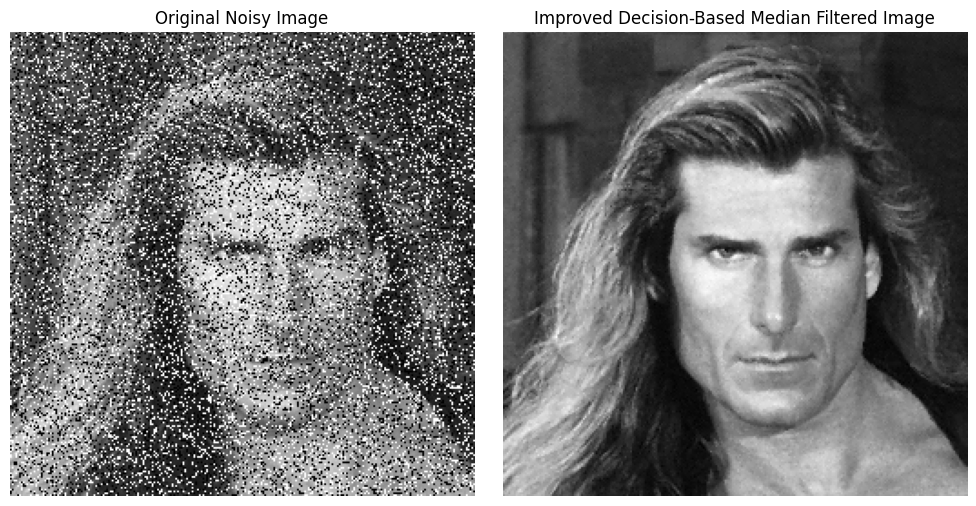

In [ ]:
def improved_decision_based_median(image, threshold=10):
    # TODO: ...
    final_image = np.copy(image)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            current_pixel = image[i, j]
            if (0 <= current_pixel <= threshold) or (255 - threshold <= current_pixel <= 255):
                neighbors = image[max(0, i-1) : min(height, i+2), max(0, j-1) : min(width, j+2)]
                valid_neighbors = neighbors[(neighbors > threshold) & (neighbors < 255 - threshold)]

                if len(valid_neighbors) > 0:
                    final_image[i, j] = np.median(valid_neighbors)

                else:
                    neighbors = image[max(0, i-2) : min(height, i+3), max(0, j-2) : min(width, j+3)]
                    valid_neighbors = neighbors[(neighbors > threshold) & (neighbors < 255 - threshold)]

                    if len(valid_neighbors) > 0:
                        final_image[i, j] = np.median(valid_neighbors)

                    else:
                        if j > 0:
                            final_image[i, j] = final_image[i, j - 1]
                        elif i > 0:
                            final_image[i, j] = final_image[i - 1, j]
                        else:
                            final_image[i, j] = current_pixel

    return final_image

final_filtered_image = improved_decision_based_median(image, threshold=10)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Noisy Image')
axs[0].axis('off')

axs[1].imshow(final_filtered_image, cmap='gray')
axs[1].set_title('Improved Decision-Based Median Filtered Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

<hr>
<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>سوال 2: پیاده‌سازی و بررسی فیلتر‌ گاوسی</h3>
          <p>
            هدف از این تمرین پیاده سازی و آشنایایی با فیلتر گاوسی می‌باشد،‌ در ابتدا با گرفتن یک سمپل با ابعاد تصویر مورد نظر از توزیع گاوسی  نویز خود را تولید میکنیم، سپس آنرا به تصویر دلخواه اضافه کرده و تصویر نویزی شده را تولید می‌کنیم. سپس با پیاده سازی فیلتر گاوسی  این فیلتر را روی عکس نویزی شده اعمال میکنیم.<br>
            همچنین تأثیرات دوگانه فیلتر گاوسی را نیز خواهیم دید: توانایی آن در کاهش نویز و تمایل آن به محو کردن لبه‌ها. خواهیم دید که چگونه اندازه کرنل این اثرات را تحت تأثیر قرار می‌دهد و اهمیت تعادل بین انتخاب پارامترهای فیلتر برای کاربردهای واقعی را خواهیم دید.
          </p>
    </div>
      
</font>

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h4>قسمت اول: تولید نویز گاوسی و اضافه کردن آن به تصویر.</h4>
        <p>
        با استفاده از تابع np.random.normal(mean, sigma, image.shape)
        یک سمپل از توزیع گاوسی با میانگین 0 و وانحراف معیار 0.1  با ابعاد تصویر برداشته و سپس
         آنرا به تصویر اصلی اضافه کنید. درنهایت تصویر اولی و تصویر نویزی شده را نمایش دهید.
        </p>
        <p>
        <font color = "yellow">
        توجه۱:           سمپل برداشته شده باید دامنه مقادیری بین ۰ تا ۲۵۵ داشته باشد. برای این کار می‌توانید سمپل برداشته شده با استفاده از تابع قبل را در 255 ضرب کنید چرا که دامنه سمپل برداشته شده با استفاده از تابع بالا بین ۰ و ۱ می‌باشد
        </font>
        </p>
        <p>
        <font color = "yellow">
        توجه۲:          ممکن است پس از اضافه کردن نویز به تصویر اصلی دامنه مقادیر بعضی از پیکسل ها بیشتر از 255 یا کمتر از 0 شود برای کنترل این منظور می‌توانید از تابع np.clip استفاده کنید. برای اطلاع از عملکرد این تابع تحقیق کنید.
        </font>
        </p>
    </div>
      
</font>

In [ ]:
image = read_image_from_url("https://i.ibb.co/4dZRRWH/patric.jpg", cv2.IMREAD_GRAYSCALE)

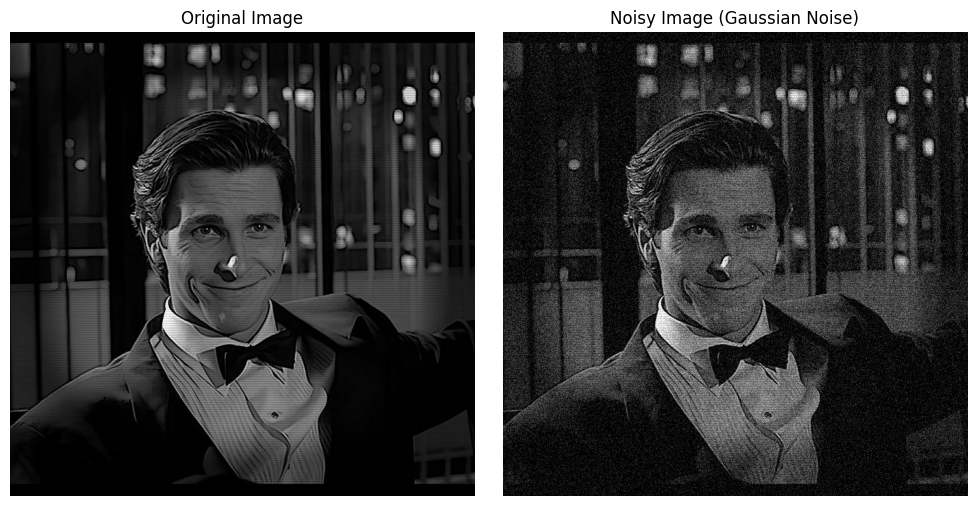

In [ ]:
# Add Gaussian noise
### TODO
gaussian_noise = (np.random.normal(loc=0, scale=0.1, size=image.shape)) * 255
gaussian_noisy_image = image + gaussian_noise
gaussian_noisy_image = np.clip(gaussian_noisy_image, 0, 255).astype(np.uint8)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(gaussian_noisy_image, cmap='gray')
axs[1].set_title('Noisy Image (Gaussian Noise)')
axs[1].axis('off')

plt.tight_layout()
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h4>قسمت دوم: پیاده سازی  فیلتر گاوسی.</h4>
    <p>
    فقط با استفاده از numpy فیلتر گاوسی را پیاده سازی کنید،‌ برای این منظور ابتدا تابع gaussian_kernel را برای ساخت کرنل گاوسی پیدا سازی کنید و سپس تابعی را تحت عنوان apply_gaussian_filter پیاده سازی کنید که با استفاده از کرنل ساخته شده فیلتر گاوسی را روی تصویر اعمال کند
    </p>
      </div>

      
</font>

In [ ]:
# 1. Function to create a 2D Gaussian kernel
def gaussian_kernel(size, sigma):
    ### TODO
    kernel = np.zeros((size, size))

    for i in range(size):
      for j in range(size):
        kernel[i, j] = (1 / (2 * np.pi * sigma**2)) * np.exp(- ((i - (size + 1) / 2)**2 + (j - (size + 1) / 2)**2) / (2 * sigma**2))

    return kernel / np.sum(kernel)

# 2. Function to apply the kernel to an image using convolution
def apply_gaussian_filter(image, kernel):
    ### TODO
    final_image = np.zeros_like(image)

    pad_size = kernel.shape[0] // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    for i in range(pad_size, padded_image.shape[0] - pad_size):
      for j in range(pad_size, padded_image.shape[1] - pad_size):
        window = padded_image[i-pad_size : i+pad_size+1, j-pad_size : j+pad_size+1]
        final_image[i-pad_size, j-pad_size] = np.sum(window * kernel)

    return final_image

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h4>قسمت سوم: اعمال فیلتر گاوسی با کرنل سایز های متفاوت.</h4>
        <p>
        فیلتر گاوسی را بر روی تصویر نویزی با سه اندازه کرنل مختلف
3×3،
5×5،
7×7 اعمال کنید.
        </p>
        <p>
        <font color = "yellow">
        انحراف معیار تابع guassian_kernel بخش قبل را برابر ۲  قرار دهید
        </font>
        </p>
    </div>
      
</font>

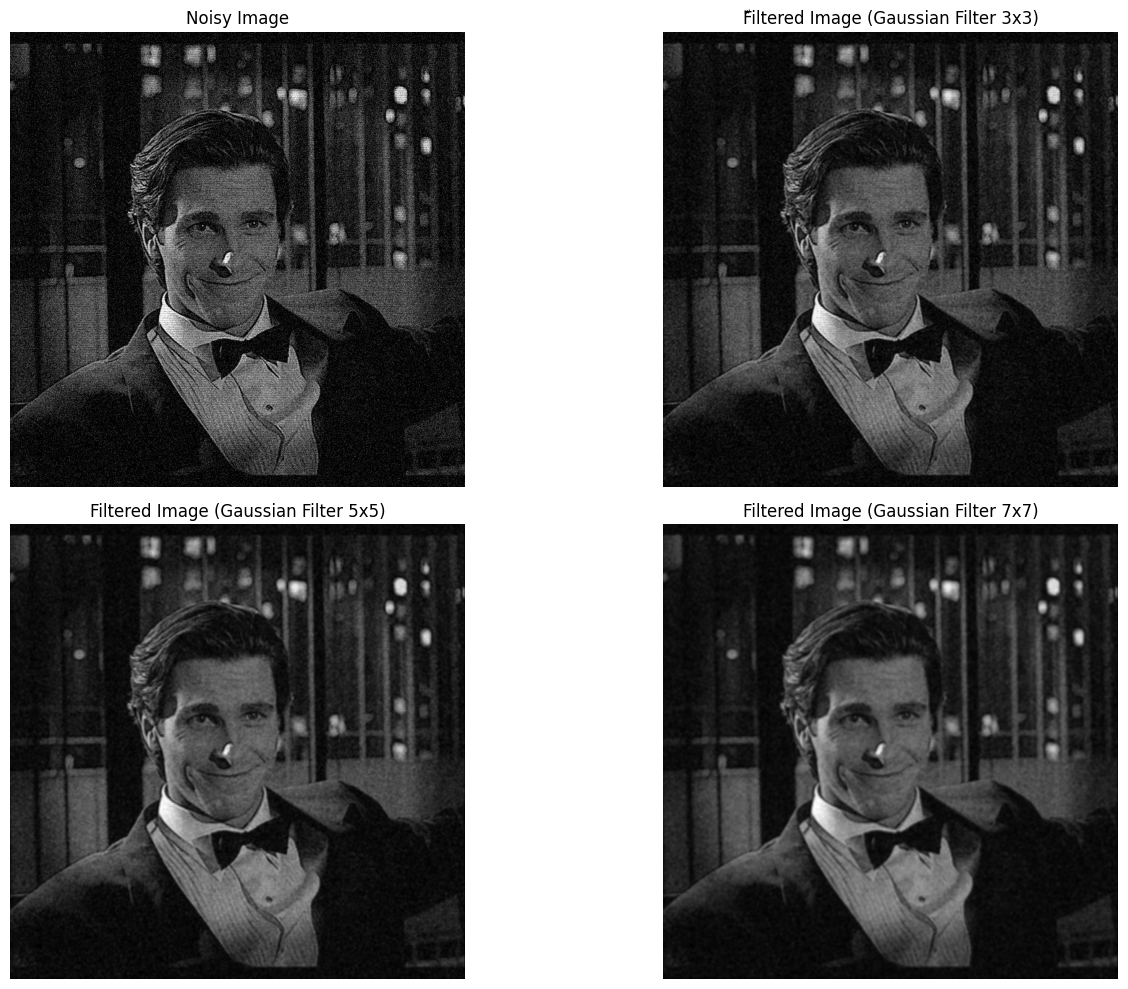

In [ ]:
# Create Kernels and Filter Image
### TODO
kernels = [gaussian_kernel(size, sigma=2) for size in [3, 5, 7]]
gaussian_filtered_images = [apply_gaussian_filter(gaussian_noisy_image, kernel) for kernel in kernels]

# Plot filtered Images
### TODO
plt.figure(figsize=(15, 10))

titles = ["Noisy Image", "ّFiltered Image (Gaussian Filter 3x3)", "Filtered Image (Gaussian Filter 5x5)", "Filtered Image (Gaussian Filter 7x7)"]

plt.subplot(2, 2, 1)
plt.title(titles[0])
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.axis('off')

for i, gaussian_filtered_image in enumerate(gaussian_filtered_images, start=1):
    plt.subplot(2, 2, i + 1)
    plt.title(titles[i])
    plt.imshow(gaussian_filtered_image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h4>قسمت چهارم: مقایسه نتایج.</h4>
        <p>
        سه تصویر بدست آمده را با یکدیگر مقایسه کنید و تاثیر سایز کرنل بر تصویر دی‌نویز شده را توضیح دهید.<br>
         همچنین در صورت علاقه می‌توانید این کار را با تغییر انحراف معیار استفاده شده در تابع تولید کرنل گاوسی نیز تکرار  کنید و تاثیر آنرا نیز مشاهده کنید.
        </p>
    </div>
      
</font>

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
با افزایش اندازه کرنل گاوسی، تأثیر فیلتر در کاهش نویز بیشتر می‌شود، اما جزئیات بیشتری از دست می‌روند و تصویر حالت مات‌تری پیدا می‌کند. در اینجا کوچک‌ترین کرنل یعنی کرنل ۳×۳، نویز را کم‌تر کاهش می‌دهد ولی جزئیات تصویر را بیشتر حفظ می‌کند، در حالی که بزرگ‌ترین کرنل یعنی کرنل ۷×۷، نویز بیش‌تری را حذف کرده و تصویر را صاف‌تر و مات‌تر می‌کند، اما باعث از دست رفتن جزئیات بیش‌تری می‌شود. بنابراین اندازه کرنل گاوسی را باید به گونه‌ای انتخاب کنیم که به خوبی تعادل میان کاهش نویز تصویر و حفظ جزئیات آن را برقرار کند.
</p>
</font>
</div>
<hr>

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>سوال 3: پیاده‌سازی و بررسی فیلتر‌ بایلترال</h3>
        <p>
            در این تمرین قرار است با فیلتر bilateral آشنا شوید. در ابتدا به پیاده سازی این فیلتر میپردازیم و بعد آن را بر روی تصویر نویزی شده در قسمت قبل بررسی میکنیم.
        </p>
    </div>
</font>

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>مرحله اول</h3>
        <p>
        در این مرحله، باید فیلتر bilateral را با توجه به تعریف آن در جزوه پیاده سازی کنید.( توجه کنید که در این قسمت مجاز به استفاده از توابع آماده در کتابخانه CV2 نیستید.)
        </p>
    </div>
</font>


In [ ]:
def bilateral_filter(image, diameter, sigma_space, sigma_intensity):
  #TODO: ...
  image = image.astype(np.float32)
  height, width = image.shape
  final_image = np.zeros((height, width))
  half_diameter = diameter // 2

  for i in range(height):
    for j in range(width):
      normal_factor, current_pixel = 0, 0

      for diff_y in range(-half_diameter, half_diameter+1):
        for diff_x in range(-half_diameter, half_diameter+1):
          x, y = diff_x + j, diff_y + i

          if (0 <= y < height) and (0 <= x < width):
            space_weight = np.exp(-0.5 * (diff_x**2 + diff_y**2)/ (np.pi * sigma_space**2))
            intensity_weight = np.exp(-0.5 * (image[y, x] - image[i, j])**2 / (np.pi * sigma_intensity**2))
            weight = space_weight * intensity_weight
            normal_factor += weight
            current_pixel += weight * image[y, x]

      final_image[i, j] = current_pixel / normal_factor if normal_factor != 0 else image[i, j]

  image = image.astype(np.uint8)
  final_image = np.clip(final_image, 0, 255).astype(np.uint8)

  return final_image

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>مرحله دوم</h3>
        <p>
        حال با استفاده از فیلتر bilateral که پیاده سازی کردید، تصویر نویزداری که در بخش قبل ساخته بودید را نویززدایی کنید.
        <br>
<font face="B Mitra" size=4 color='e74c3c'>
پارامتر‌های فیلتر را به گونه‌ای تنظیم کنید که تصویر نهایی تفاوت مشهودی با تصویر حاصل از اعمال فیلتر گاوسی داشته باشد. خروجی مورد انتظار:
        </p>
    </div>
</font>
</font>
<div style="display: flex; justify-content: center;">
<img src="https://i.ibb.co/tDP7999/output.png" width="1400" style="display:inline;">
</div>


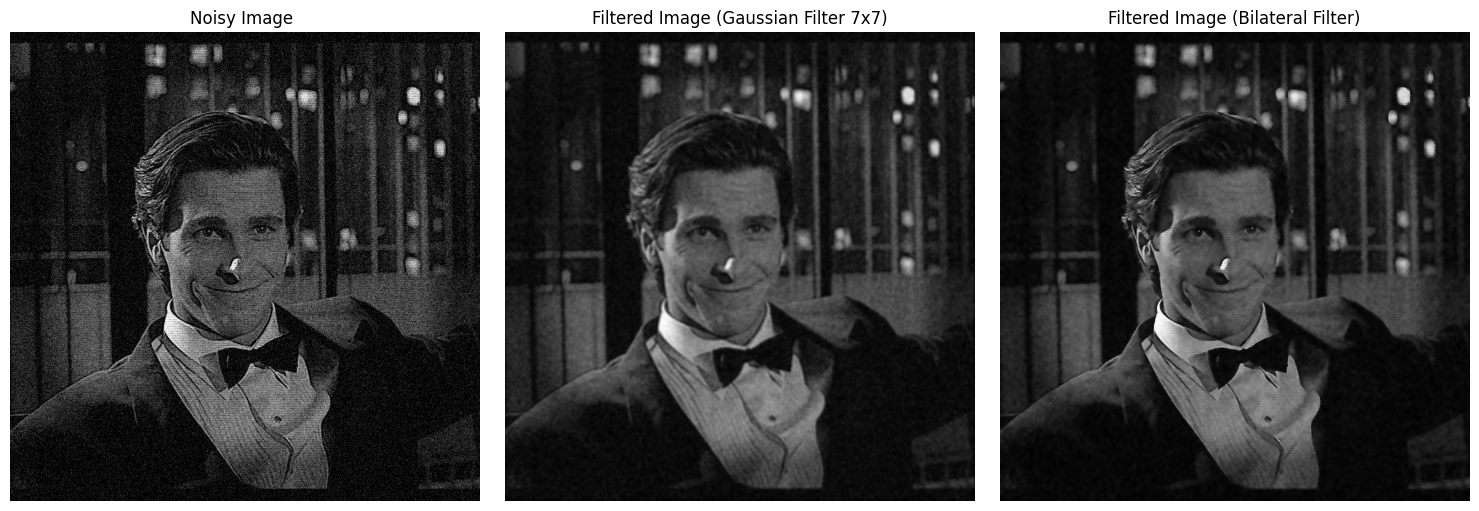

In [ ]:
#TODO: Apply Bilateral Filter to Denoise Noisy Image
diameter = 7
sigma_space = 75
sigma_intensity = 30

bilateral_filtered_image = bilateral_filter(gaussian_noisy_image, diameter, sigma_space, sigma_intensity)
gaussian_filtered_image = apply_gaussian_filter(gaussian_noisy_image, gaussian_kernel(size=7, sigma=2))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(gaussian_noisy_image, cmap='gray')
axs[0].set_title('Noisy Image ')
axs[0].axis('off')

axs[1].imshow(gaussian_filtered_image, cmap='gray')
axs[1].set_title('Filtered Image (Gaussian Filter 7x7)')
axs[1].axis('off')

axs[2].imshow(bilateral_filtered_image, cmap='gray')
axs[2].set_title('Filtered Image (Bilateral Filter)')
axs[2].axis('off')

plt.tight_layout()
plt.show()

<hr>
<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>سوال 4: فشرده سازی تصویر
       </h3>
        <p>
در این تمرین، شما با استفاده از تبدیل فوریه، باید یک تصویر را فشرده سازی کنید.
<br>
<font face="B Mitra" size=4 color='e74c3c'>
شما می توانید در این مراحل از کتابخانه numpy استفاده نمایید.
        </p>
    </div>
</font>





In [ ]:
image = read_image_from_url('https://i.ibb.co/WHHTwFZ/lena.png', cv2.IMREAD_GRAYSCALE)

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3></h3>
        <p>
1) ابتدا باید FFT دو بعدی تصویر محاسبه شود.
سپس باید تغییر مکان دامنه های فرکانسی به مرکز تصویر برای تسهیل پردازش انجام شود.(FFTshift)
<br>
2) سپس طیف دامنه را نمایش دهید. مقدار طیف دامنه با استفاده از لگاریتم قدر مطلق مقادیر FFT محاسبه می‌شود.
</p>


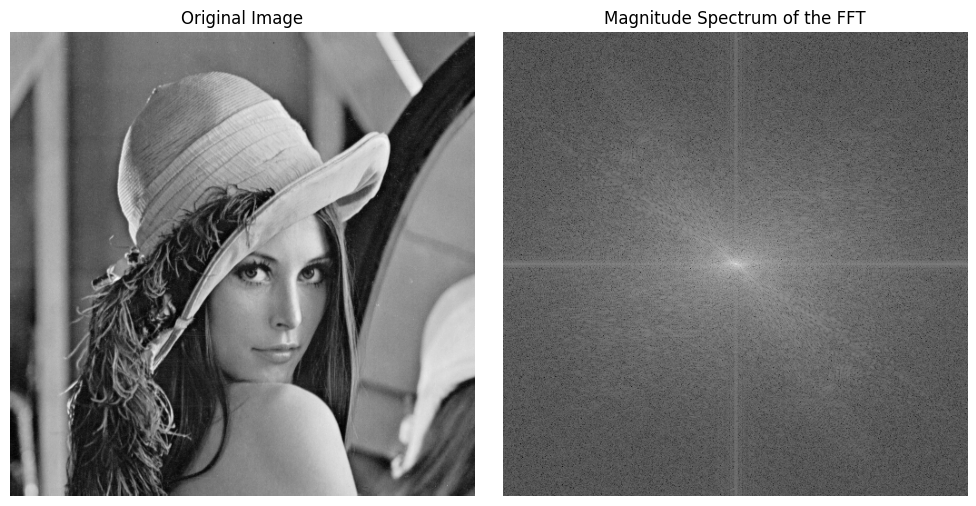

In [ ]:
# Step 1: Apply FFT to the image
#TODO: ...
fft_shifted = np.fft.fftshift(np.fft.fft2(image))
fft_magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)

# Step 2: plot the magnitude spectrum of the FFT
#TODO: ...
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(fft_magnitude_spectrum, cmap='gray')
axs[1].set_title('Magnitude Spectrum of the FFT')
axs[1].axis('off')

plt.tight_layout()
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>به سوال زیر پاسخ دهید</h3>
        <p>
از طیف دامنه چه اطلاعاتی میتوان بدست آورد؟


<font face="B Mitra" size=5, color='cyan'>
</font>


<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
طیف دامنه اطلاعات مهمی درباره‌ی فرکانس‌های موجود در یک تصویر یا سیگنال را به ما می‌دهد که به کمک آن می‌توانیم ویژگی‌های فرکانسی تصویر یا سیگنال را بهتر درک کنیم و بر اساس آن‌ها عملیات مختلفی انجام دهیم. مانند:
<br>
1- تشخیص فرکانس‌های مهم: نقاط روشن‌تر در طیف دامنه نشان‌دهنده فرکانس‌های مهم
 و در واقع اطلاعات مهم تصویر یا سیگنال هستند.
<br>
2- فشرده‌سازی تصویر: با حذف نقاط با فرکانس‌های کم‌اهمیت، می‌توان حجم داده‌ها را کاهش داد و تصویر را فشرده کرد.
<br>
3- تشخیص و حذف نویز: نویزها معمولاً به صورت نقاط تصادفی در نواحی با فرکانس بالا در طیف دامنه ظاهر می‌شوند و می‌توان آن‌ها را شناسایی و حذف کرد.
<br>
4- تشخیص الگوها: الگوهای تکراری مانند خطوط و لبه‌ها در طیف دامنه به صورت نقاط یا خطوط خاصی ظاهر می‌شوند.

</p>
</font>
</div>
<hr>


<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3></h3>
        <p>
3) سپس برای فشرده سازی تصویر، باید ماسک مربوط به فرکانس‌های پایین تصویر FFT ایجاد شود.
برای این کار thresholdی از مقادیر FFT را به دست آورید که 90 درصد مقادیر کوچک تر از آن باشند.
<br>
4) ماسک ایجادشده روی مقادیر FFT اعمال کنید تا تنها فرکانس‌های مهم باقی بمانند. سپس طیف دامنه نگه داشته شده را نمایش دهید.

</p>



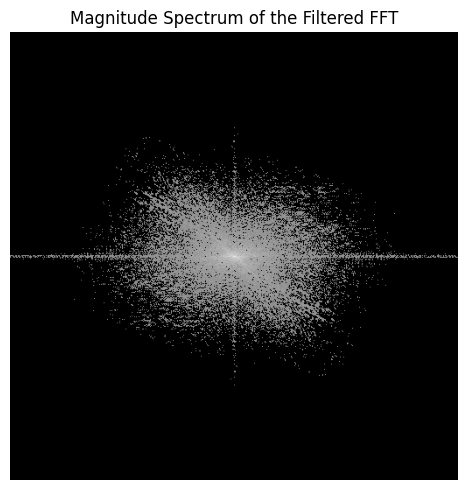

In [ ]:
# Step 3: find the threshold value and create a mask
# TODO: ...
sorted_fft = np.sort(np.abs(fft_shifted).ravel())
threshold = sorted_fft[int(0.9 * len(sorted_fft))]
fft_mask = np.abs(fft_shifted) >= threshold

# Step 4: Apply the mask to the FFT image and plot magnitude spectrum of the filtered FFT
#TODO: ...
filtered_fft = fft_shifted * fft_mask
filtered_fft_magnitude_spectrum = np.log(np.abs(filtered_fft) + 1)

plt.figure(figsize=(10, 5))
plt.imshow(filtered_fft_magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum of the Filtered FFT')
plt.axis('off')
plt.tight_layout()
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3></h3>
        <p>
5) با استفاده از تبدیل فوریه معکوس (Inverse FFT)، تصویر را دوباره به دامنه فضایی بازگردانید.
<br>
6) تصویر فشرده شده را به همراه تصویر اصلی نمایش دهید.

</p>



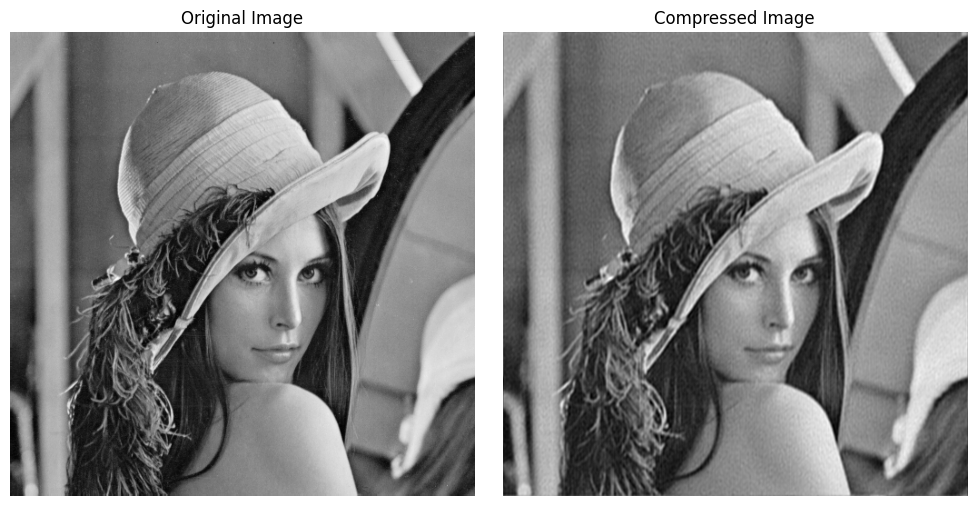

In [ ]:
# Step 5: Reconstruct the compressed image
#TODO: ...
inverse_fft = np.fft.ifftshift(filtered_fft)
compressed_image = np.abs(np.fft.ifft2(inverse_fft))

# Step 6: Plot the original and compressed images
#TODO: ...
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(compressed_image, cmap='gray')
axs[1].set_title('Compressed Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()